# Hello LAS file format

## Prerequisites

In [1]:
# Prerequisites:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import laspy

print("Python version: ", sys.version)
print("Laspy version: ", laspy.__version__)

Python version:  3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]
Laspy version:  2.5.4


## Read LAS File

Read everything, including header, vlrs, and point records

In [2]:
pc = laspy.read("point_clouds\sample_drive_capture.las")
print("Data type of the point cloud is: ", type(pc))

Data type of the point cloud is:  <class 'laspy.lasdata.LasData'>


## Examine Point Cloud Dimensions

In [3]:
print("Header: ", pc.header)
print("Point Count: ", pc.header.point_count)

Header:  <LasHeader(1.2, <PointFormat(3, 92 bytes of extra dims)>)>
Point Count:  1020957


#### Check point format

In [31]:
point_format = pc.point_format
print("Point format ID: ", point_format.id)
print(f"Point size: {point_format.size} bytes")

Point format ID:  3
Point size: 126 bytes


#### Check Dimensions (Attributes)

In [32]:
# Dimension names
names = list(pc.point_format.dimension_names)
print("Number of dimensions: ", len(names))
print("All Dimension names: ", names)
print("----------------------------------")

# Standard dimensions
standard_dim_names = list(pc.point_format.standard_dimension_names)
print("Number of standard dimensions: ", len(standard_dim_names))
print("Standard dimension names: ", standard_dim_names)
print("----------------------------------")

# Extra dimensions
extra_dim_names = list(pc.point_format.extra_dimension_names)
print("Number of extra dimensions: ", len(extra_dim_names))
print("Extra dimension names: ", extra_dim_names)

Number of dimensions:  54
All Dimension names:  ['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns', 'scan_direction_flag', 'edge_of_flight_line', 'classification', 'synthetic', 'key_point', 'withheld', 'scan_angle_rank', 'user_data', 'point_source_id', 'gps_time', 'red', 'green', 'blue', 'ScanChannel', 'ClassFlags', 'Reflectance', 'IsPpsLocked', 'Azimuth', 'EchoRange', 'ElevationHigh', 'PointId', 'ray_id', 'frame_sequence', 'packet_sequence', 'header_reserved_l', 'header_reserved1_l', 'scan_state', 'ray_sequence', 'blockage_indicator', 'line_number', 'roi', 'ray_qualifier', 'ray_reserved1', 'ray_reserved2', 'snr', 'point_type', 'filter_flag_count', 'retro_artifact_debug_bit', 'range_wrap_debug_bit', 'min_range_debug_bit', 'crosstalk_debug_bit', 'low_reflectance_debug_bit', 'packet_data_qualifier', 'scan_channel', 'ptp_time_sec', 'ptp_time_nsec', 'ray_header_ptp_time_nsec', 'ray_header_ptp_time_delts_nsec']
----------------------------------
Number of standard dimensions:

In [33]:
# Access to points:
print("Type of X data: ", type(pc["X"]))
print("Number of X points: ", len(pc["X"]))

Type of X data:  <class 'numpy.ndarray'>
Number of X points:  1020957


## Point Format for each point

In [34]:
point_fmt = pc.point_format
print("Point format: ", point_fmt)

for i in range(len(list(point_fmt.standard_dimension_names))):
    print(f"Point Format [{i}] name: {point_fmt[i].name}")
    print(f"Point Format [{i}] # of bits: {point_fmt[i].num_bits}")
    print(f"Point Format [{i}] kind: {point_fmt[i].kind}")
    print(f"Point Format [{i}] min: {point_fmt[i].min}")
    print(f"Point Format [{i}] max: {point_fmt[i].max}")

Point format:  <PointFormat(3, 92 bytes of extra dims)>
Point Format [0] name: X
Point Format [0] # of bits: 32
Point Format [0] kind: DimensionKind.SignedInteger
Point Format [0] min: -2147483648
Point Format [0] max: 2147483647
Point Format [1] name: Y
Point Format [1] # of bits: 32
Point Format [1] kind: DimensionKind.SignedInteger
Point Format [1] min: -2147483648
Point Format [1] max: 2147483647
Point Format [2] name: Z
Point Format [2] # of bits: 32
Point Format [2] kind: DimensionKind.SignedInteger
Point Format [2] min: -2147483648
Point Format [2] max: 2147483647
Point Format [3] name: intensity
Point Format [3] # of bits: 16
Point Format [3] kind: DimensionKind.UnsignedInteger
Point Format [3] min: 0
Point Format [3] max: 65535
Point Format [4] name: return_number
Point Format [4] # of bits: 3
Point Format [4] kind: DimensionKind.BitField
Point Format [4] min: 0
Point Format [4] max: 7
Point Format [5] name: number_of_returns
Point Format [5] # of bits: 3
Point Format [5] kind

## Access Variable Length Records (VLRs)

In [35]:
print("VLRs: ", pc.vlrs)

VLRs:  [<ExtraBytesVlr(extra bytes structs: 35)>]


## Manipulating Points

#### Check Min and Max Values

In [36]:
### Check Min and Max values for coordinates and intensity
print(f"X min: {pc.x.min()} X max: {pc.x.max()}")
print(f"Y min: {pc.y.min()} Y max: {pc.y.max()}")
print(f"Z min: {pc.z.min()} Z max: {pc.z.max()}")
print(f"Intensity min: {pc.intensity.min()} Intensity max: {pc.intensity.max()}")
print(f"Return Number min: {pc.return_num.min()} Return Number max: {pc.return_num.max()}")
print(f"Number of Returns min: {pc.num_returns.min()} Number of Returns max: {pc.num_returns.max()}")
print(f"Number of Returns min: {pc.Reflectance.min()} Number of Returns max: {pc.Reflectance.max()}")


X min: 0.0 X max: 234.19
Y min: -127.99000000000001 Y max: 117.35000000000001
Z min: -29.89 Z max: 31.13
Intensity min: 0 Intensity max: 0
Return Number min: 0 Return Number max: 2
Number of Returns min: 0 Number of Returns max: 2
Number of Returns min: 0.0 Number of Returns max: 3.99993896484375


## Filter

#### Grab points that are withing 10 meters from origin

In [37]:
# Grab x, y, and z coordinates
coords = np.vstack((pc.x, pc.y, pc.z)).transpose()
print("Shape of the coordinates: ", coords.shape)

# Calculate euclidian distance from all points to the origin
dists = np.linalg.norm(coords, axis=1)
print("Shape of the distances: ", dists.shape)

mask = dists < 10
print("Number of points within 10m: ", np.sum(mask))

points_within_10m = pc.points[mask]
print("Number of points within 10m: ", len(points_within_10m))

Shape of the coordinates:  (1020957, 3)
Shape of the distances:  (1020957,)
Number of points within 10m:  448823
Number of points within 10m:  448823


#### Nearest neibhbor search

In [38]:
from scipy.spatial import cKDTree

# Get a numpy array of the point cloud
dataset = np.vstack([pc.x, pc.y, pc.z]).transpose()

# Build a KDTree
tree = cKDTree(dataset)

neighbors_distance, neighbors_indeces = tree.query(dataset[1000], k=8)
print("Distances to the 8 neighbors: ", neighbors_distance)
print("Indeces of the 8 neighbors: ", neighbors_indeces)

Distances to the 8 neighbors:  [0.         0.14071247 0.1979899  0.2184033  0.24779023 0.25199206
 0.26038433 0.27092434]
Indeces of the 8 neighbors:  [  1000 742470 749610 829456 824637   2026 836568   1477]


#### Get Last Returns

In [39]:
last_returns = pc.points[pc.num_returns == pc.return_num]
print("Number of last returns: ", len(last_returns))

Number of last returns:  933120


#### Plot histogram of Reflectivity

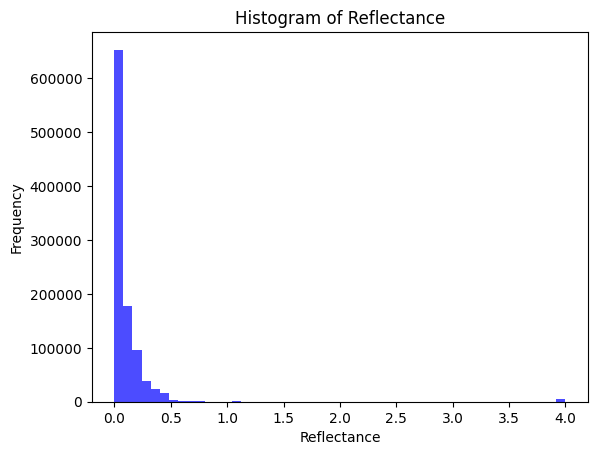

In [40]:
plt.hist(pc.Reflectance, bins=50, color='b', alpha=0.7)
plt.xlabel("Reflectance")
plt.ylabel("Frequency")
plt.title("Histogram of Reflectance")
plt.show()

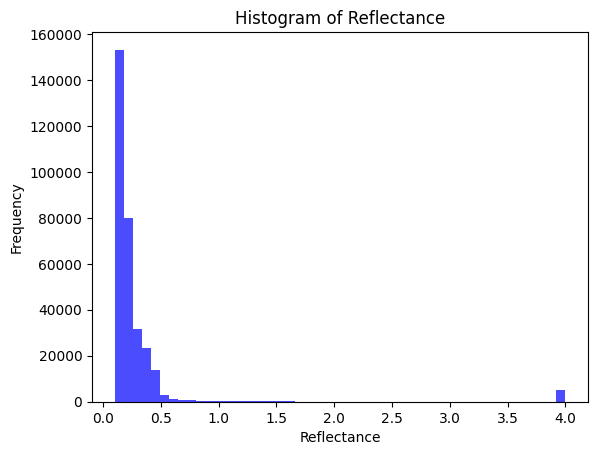

In [41]:
# Exclude really more reflectance values

plt.hist(pc.Reflectance[pc.Reflectance > 0.1], bins=50, color='b', alpha=0.7)
plt.xlabel("Reflectance")
plt.ylabel("Frequency")
plt.title("Histogram of Reflectance")
plt.show()


In [42]:
# Number of returns with reflectance value 0.0
print("Number of returns with reflectance value 0.0: ", np.sum(pc.Reflectance == 0.0))
print("Number of returns with reflectance value > 3.0: ", np.sum(pc.Reflectance > 3.0))

Number of returns with reflectance value 0.0:  315430
Number of returns with reflectance value > 3.0:  5244


## Bounding Box

#### Extract points withing a bounding box and save to a file

In [7]:


# Define bounding box limits
x_min, x_max = 30.0, 40.0
y_min, y_max = -10.0, 10.0
z_min, z_max = -1.0, 3.0

# Create a boolean mask for points within the bounding box
mask = (
    (pc.x >= x_min) & (pc.x <= x_max) &
    (pc.y >= y_min) & (pc.y <= y_max) &
    (pc.z >= z_min) & (pc.z <= z_max)
)

nr_points_in_bbox = np.sum(mask)
print(f"Number of points within the bounding box: {nr_points_in_bbox}")

# Extract the subset of points using the mask
bbox_points = pc.points[mask]


# Create a new LAS file with the filtered points
new_las = laspy.LasData(pc.header)
new_las.points = bbox_points

# Write the filtered data to a new LAS file
output_file = 'data/output_bounding_box.las'
new_las.write(output_file)

print(f"Bounding box LAS file saved as: {output_file}")


Number of points within the bounding box: 8656
Bounding box LAS file saved as: data/output_bounding_box.las
